In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

В качестве непрерывного распределения бало взято [распределение хи-квадрат](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82)

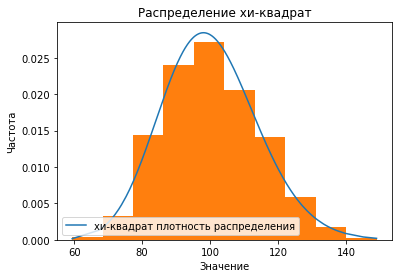

In [184]:
# Параметр k отвечает за кол-во степерей свободы распределения(кол-во параметров в векторе) 
# и как сделствие за диапозон получаемых чисел
k = 100

# Новый ренератор случайных чисел
rv = chi2(k)

samples = rv.rvs(size=1000)
samples.sort()

# Фенкция pdf пеализует функцию плотности распределения 
plt.plot(samples, rv.pdf(samples), label = 'хи-квадрат плотность распределения')

plt.hist(samples, normed=True)
plt.title('Распределение хи-квадрат')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.legend()

plt.show()

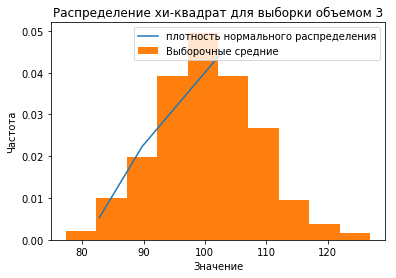

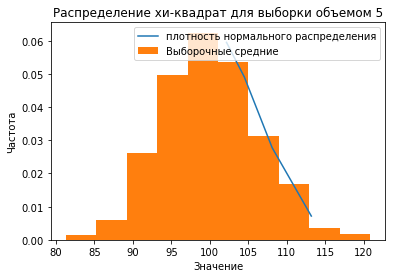

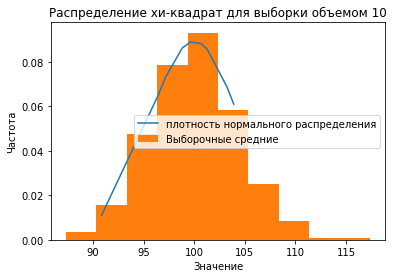

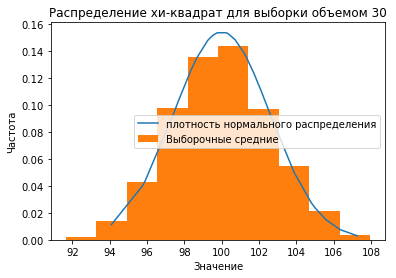

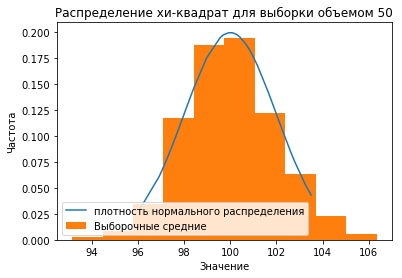

In [181]:
from scipy.stats import norm

# Расчет выборочного среднего по формуле из лекции
def sample_mean(sample):
    return np.sum(sample) * (1 / len(sample))

# Отображение графика и гистограммы
def figure(sample, x, y, number):
    
    plt.plot(x, y, label = 'плотность нормального распределения')
    
    plt.hist(sample, normed=True, label = 'Выборочные средние')
    plt.title('Распределение хи-квадрат для выборки объемом ' + str(number))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.legend()

    plt.show()
    
def selection(number):
    # Рачсет дисперсии по формуле из википедии    
    disp = k * 2
    # Рачсет мат. ожидания по формуле из википедии
    me = k
    
    sigma = disp**0.5
    Sn = sigma/(n**0.5)
    
    n_rv = norm(me, Sn)
    
    samples_norm = n_rv.rvs(size=number)
    samples_norm.sort()
    y_norm = n_rv.pdf(samples_norm)
    
    samples_chi2 = [rv.rvs(size=number) for x in range(1001)]
    sample_means = [sample_mean(x) for x in samples_chi2]
    
    figure(sample_means, samples_norm, y_norm, number)


for n in [3, 5, 10, 30, 50]:
    selection(n)

### Вывод

При увеличении объектов уменьшается разброс значенией выборки. В выборке получается больше объектов стремящихся к среднему, что позволяет более точно вычислить выборочное среднее, что в свою очередь позволяет приблизить взятое непрерывное распределение к нормальному.